In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("./dataset/mini_10000.csv")

In [3]:
data.head()

,unique_identifier,native word,english word
0,nep1,मुस्कुराउँदै,muskuraundai
1,nep2,मान्दछन्,mandachhan
2,nep3,भएझैं,bhaejhain
3,nep4,हराउँछ,haraaunchha
4,nep5,मुन्टो,munto


In [4]:
data.tail()

,unique_identifier,native word,english word
9995,nep9996,सम्बोधनमाथि,sambodhanmathi
9996,nep9997,बिताएः,bitaeh
9997,nep9998,ब्राण्डनिष्ठाका,brandnishthaka
9998,nep9999,एन्ड्रोलोजीमा,andrologyma
9999,nep10000,छानबिनतर्फ,chhanbintarf


In [5]:
data["english word"] = data["english word"].apply(lambda x: f"<{x}>")

In [6]:
data.head()

,unique_identifier,native word,english word
0,nep1,मुस्कुराउँदै,<muskuraundai>
1,nep2,मान्दछन्,<mandachhan>
2,nep3,भएझैं,<bhaejhain>
3,nep4,हराउँछ,<haraaunchha>
4,nep5,मुन्टो,<munto>


In [7]:
devnagari_words = data["native word"].values
english_words = data["english word"].values

In [8]:
devnagari_words[:10]

array(['मुस्कुराउँदै', 'मान्दछन्', 'भएझैं', 'हराउँछ', 'मुन्टो', 'सोचेर',
       'प्रवृत्तिलाई', 'भट्टाचार्यले', 'सर्दै', 'मूर्तिहरू'], dtype=object)

In [9]:
english_words[:10]

array(['<muskuraundai>', '<mandachhan>', '<bhaejhain>', '<haraaunchha>',
       '<munto>', '<sochera>', '<prawrittilai>', '<bhattacharyale>',
       '<sardai>', '<murtiharu>'], dtype=object)

In [10]:
devnagari_roman_words = np.concatenate([devnagari_words, english_words])

In [11]:
len(devnagari_roman_words)

20000

In [12]:
list(devnagari_words[0])

['म', 'ु', 'स', '्', 'क', 'ु', 'र', 'ा', 'उ', 'ँ', 'द', 'ै']

In [13]:
list(english_words[0])

['<', 'm', 'u', 's', 'k', 'u', 'r', 'a', 'u', 'n', 'd', 'a', 'i', '>']

In [14]:
set(devnagari_words[0])

{'ँ', 'उ', 'क', 'द', 'म', 'र', 'स', 'ा', 'ु', 'ै', '्'}

In [15]:
devnagari_vocab = set()

for word in devnagari_words:
    devnagari_vocab.update(set(word))

In [16]:
roman_nepali_vocab = set()

for word in english_words:
    roman_nepali_vocab.update(set(word))

In [17]:
vocabulary = list(devnagari_vocab.union(roman_nepali_vocab))

In [18]:
print(f"Devnagari vocab size: {len(devnagari_vocab)}")
print(f"Roman nepali vocab: {len(roman_nepali_vocab)}")
print(f"All size: {len(vocabulary)}")

Devnagari vocab size: 61
Roman nepali vocab: 28
All size: 89


In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [20]:
tokenizer = Tokenizer(num_words=len(vocabulary), char_level=True, oov_token="<OOV>")

tokenizer.fit_on_texts(devnagari_roman_words)

In [21]:
devnagari_roman_words[:10], devnagari_roman_words[-10:]

(array(['मुस्कुराउँदै', 'मान्दछन्', 'भएझैं', 'हराउँछ', 'मुन्टो', 'सोचेर',
        'प्रवृत्तिलाई', 'भट्टाचार्यले', 'सर्दै', 'मूर्तिहरू'], dtype=object),
 array(['<dhungeko>', '<bharatweshthit>', '<wired>', '<pariwarkoko>',
        '<vidhiraj>', '<sambodhanmathi>', '<bitaeh>', '<brandnishthaka>',
        '<andrologyma>', '<chhanbintarf>'], dtype=object))

In [22]:
all_vocab = tokenizer.word_index

In [23]:
vocab_size = tokenizer.num_words + 1 # for oov token

In [24]:
print(f"The size of vocab is: {vocab_size}")

The size of vocab is: 90


In [25]:
all_vocab, len(all_vocab)

({'<OOV>': 1,
  'a': 2,
  '<': 3,
  '>': 4,
  'ा': 5,
  'i': 6,
  'h': 7,
  '्': 8,
  'n': 9,
  'r': 10,
  'र': 11,
  'k': 12,
  'e': 13,
  'क': 14,
  'न': 15,
  't': 16,
  's': 17,
  'ि': 18,
  'l': 19,
  'ल': 20,
  'u': 21,
  'o': 22,
  'े': 23,
  'm': 24,
  'म': 25,
  'स': 26,
  'ो': 27,
  'd': 28,
  'त': 29,
  'b': 30,
  'ु': 31,
  'p': 32,
  'य': 33,
  'g': 34,
  'प': 35,
  'ी': 36,
  'y': 37,
  'ह': 38,
  'c': 39,
  'व': 40,
  'द': 41,
  'ब': 42,
  'ग': 43,
  'ट': 44,
  'ज': 45,
  'w': 46,
  'j': 47,
  'ड': 48,
  'ू': 49,
  'च': 50,
  'भ': 51,
  'श': 52,
  'ँ': 53,
  'ै': 54,
  'ख': 55,
  'थ': 56,
  'छ': 57,
  'उ': 58,
  'अ': 59,
  'ए': 60,
  'ध': 61,
  'इ': 62,
  'ई': 63,
  'ं': 64,
  'फ': 65,
  'f': 66,
  'v': 67,
  'ष': 68,
  'ण': 69,
  'आ': 70,
  'ङ': 71,
  'ौ': 72,
  'ृ': 73,
  'ठ': 74,
  'घ': 75,
  'z': 76,
  'झ': 77,
  'ओ': 78,
  'ञ': 79,
  'ढ': 80,
  'q': 81,
  'ः': 82,
  '॰': 83,
  'x': 84,
  'औ': 85,
  '़': 86,
  'ऐ': 87,
  'ऊ': 88,
  'ऋ': 89,
  'ॉ': 90},
 90)

In [26]:
max_sequence_devnagari = max([len(word) for word in devnagari_words])

max_sequence_roman_nepali = max([len(word) for word in english_words])

max_sequence_length = max([len(word) for word in devnagari_roman_words])

print(f"Max sequence length for devnagari: {max_sequence_devnagari}")
print(f"Max sequence length for roman nepali: {max_sequence_roman_nepali}")
print(f"Max sequence length for both: {max_sequence_length}")

Max sequence length for devnagari: 19
Max sequence length for roman nepali: 25
Max sequence length for both: 25


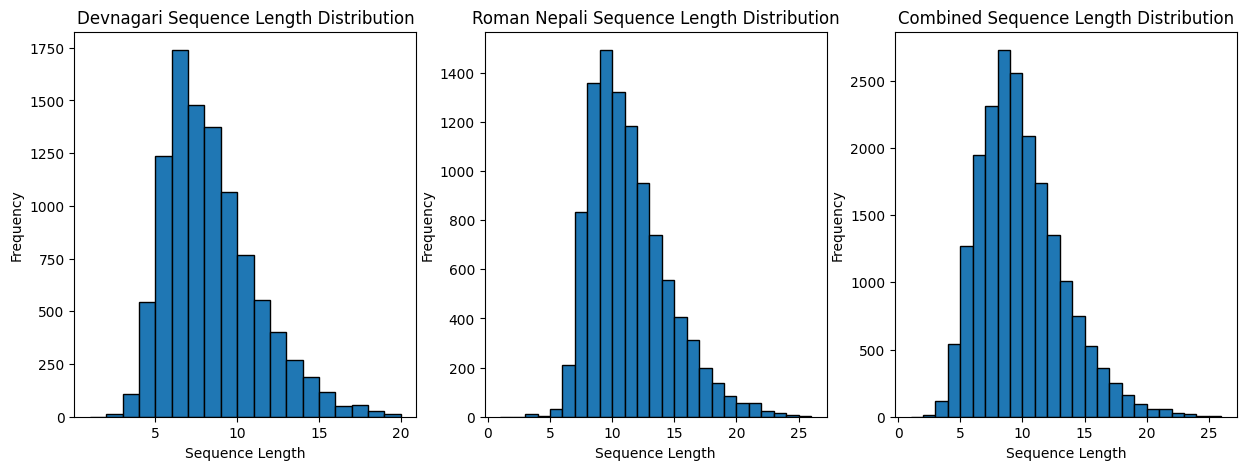

In [27]:
# Sequence lengths for Devnagari words
sequence_lengths_devnagari = [len(word) for word in devnagari_words]

# Sequence lengths for Roman Nepali words
sequence_lengths_roman_nepali = [len(word) for word in english_words]

sequence_lengths = [len(word) for word in devnagari_roman_words]

# Plot for Devnagari words
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(sequence_lengths_devnagari, bins=range(1, max_sequence_devnagari + 2), edgecolor='black')
plt.title('Devnagari Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')

# Plot for Roman Nepali words
plt.subplot(1, 3, 2)
plt.hist(sequence_lengths_roman_nepali, bins=range(1, max_sequence_roman_nepali + 2), edgecolor='black')
plt.title('Roman Nepali Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')

# Plot for both combined
plt.subplot(1, 3, 3)
plt.hist(sequence_lengths, bins=range(1, max_sequence_length + 2), edgecolor='black')
plt.title('Combined Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')

plt.show()

In [28]:
MAX_SEQUENCE_LENGTH = 20

In [29]:
x_train = tokenizer.texts_to_sequences(devnagari_words)
y_train = tokenizer.texts_to_sequences(english_words)

In [30]:
random_nums = np.random.randint(0, len(devnagari_words), 10)

for i in random_nums:
    print(f"Devnagari: {devnagari_words[i]}")
    print(f"Devnagari sequence: {x_train[i]}")
    print("+++++++++++++++++++++++++++++++++++++++++++")
    print(f"Roman Nepali: {english_words[i]}")
    print(f"Roman Sequence: {y_train[i]}\n")
    print("===========================================\n")

Devnagari: ग्रिल्स
Devnagari sequence: [43, 8, 11, 18, 20, 8, 26]
+++++++++++++++++++++++++++++++++++++++++++
Roman Nepali: <grylls>
Roman Sequence: [3, 34, 10, 37, 19, 19, 17, 4]


Devnagari: पूर्वतर्फमात्रै
Devnagari sequence: [35, 49, 11, 8, 40, 29, 11, 8, 65, 25, 5, 29, 8, 11, 54]
+++++++++++++++++++++++++++++++++++++++++++
Roman Nepali: <purwatarfamatrai>
Roman Sequence: [3, 32, 21, 10, 46, 2, 16, 2, 10, 66, 2, 24, 2, 16, 10, 2, 6, 4]


Devnagari: हाँस्ने
Devnagari sequence: [38, 5, 53, 26, 8, 15, 23]
+++++++++++++++++++++++++++++++++++++++++++
Roman Nepali: <hansne>
Roman Sequence: [3, 7, 2, 9, 17, 9, 13, 4]


Devnagari: विभागबाट
Devnagari sequence: [40, 18, 51, 5, 43, 42, 5, 44]
+++++++++++++++++++++++++++++++++++++++++++
Roman Nepali: <vibhagbata>
Roman Sequence: [3, 67, 6, 30, 7, 2, 34, 30, 2, 16, 2, 4]


Devnagari: देवरकोन्डा
Devnagari sequence: [41, 23, 40, 11, 14, 27, 15, 8, 48, 5]
+++++++++++++++++++++++++++++++++++++++++++
Roman Nepali: <devarakonda>
Roman Sequence: [3, 2

In [31]:
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences

In [32]:
y_train[:10]

[[3, 24, 21, 17, 12, 21, 10, 2, 21, 9, 28, 2, 6, 4],
 [3, 24, 2, 9, 28, 2, 39, 7, 7, 2, 9, 4],
 [3, 30, 7, 2, 13, 47, 7, 2, 6, 9, 4],
 [3, 7, 2, 10, 2, 2, 21, 9, 39, 7, 7, 2, 4],
 [3, 24, 21, 9, 16, 22, 4],
 [3, 17, 22, 39, 7, 13, 10, 2, 4],
 [3, 32, 10, 2, 46, 10, 6, 16, 16, 6, 19, 2, 6, 4],
 [3, 30, 7, 2, 16, 16, 2, 39, 7, 2, 10, 37, 2, 19, 13, 4],
 [3, 17, 2, 10, 28, 2, 6, 4],
 [3, 24, 21, 10, 16, 6, 7, 2, 10, 21, 4]]

In [33]:
x_train = pad_sequences(x_train, maxlen=MAX_SEQUENCE_LENGTH, padding="pre", truncating="post")

In [34]:
x_train[:10]

array([[ 0,  0,  0,  0,  0,  0,  0,  0, 25, 31, 26,  8, 14, 31, 11,  5,
        58, 53, 41, 54],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25,  5, 15,  8,
        41, 57, 15,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 51,
        60, 77, 54, 64],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 38, 11,
         5, 58, 53, 57],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25, 31,
        15,  8, 44, 27],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26,
        27, 50, 23, 11],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  8, 11, 40, 73, 29,  8, 29,
        18, 20,  5, 63],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 51, 44,  8, 44,  5, 50,  5, 11,
         8, 33, 20, 23],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26,
        11,  8, 41, 54],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25, 49, 11,  8, 29,
        18, 38, 11, 49]])

In [35]:
x_train[0], list(devnagari_words[0])

(array([ 0,  0,  0,  0,  0,  0,  0,  0, 25, 31, 26,  8, 14, 31, 11,  5, 58,
        53, 41, 54]),
 ['म', 'ु', 'स', '्', 'क', 'ु', 'र', 'ा', 'उ', 'ँ', 'द', 'ै'])

In [36]:
x_train[0], y_train[0], devnagari_words[0], english_words[0]

(array([ 0,  0,  0,  0,  0,  0,  0,  0, 25, 31, 26,  8, 14, 31, 11,  5, 58,
        53, 41, 54]),
 [3, 24, 21, 17, 12, 21, 10, 2, 21, 9, 28, 2, 6, 4],
 'मुस्कुराउँदै',
 '<muskuraundai>')

In [37]:
encoder_input_data = np.array(x_train)

decoder_input_data = [seq[:-1] for seq in y_train] # remove last  from each.
# the end token > is removed from the decoder input because the decoder input start with start token < and all other token except the last end token > where it start to predict the next token in the sequence.
# the decoder target will be the same as decoder input but shifted by one time step which is also known as teacher forcing.

decoder_output_data = [seq[1:] for seq in y_train] # remove first from each.
# the decoder output is the target sequence shifted by one position to the left compared to the input so the model will learn to predict the next token.

In [38]:
decoder_input_data = pad_sequences(decoder_input_data, maxlen=MAX_SEQUENCE_LENGTH, padding="pre", truncating="post")
decoder_output_data = pad_sequences(decoder_output_data, maxlen=MAX_SEQUENCE_LENGTH, padding="pre", truncating="post")

In [39]:
print(encoder_input_data[0]) # used to fed the encoder model to get the context for the decoder
print(decoder_input_data[0]) # used to fed the decoder model to predict the next token in the sequence
print(decoder_output_data[0]) # used as the output for decoder for each time step as teacher forcing

[ 0  0  0  0  0  0  0  0 25 31 26  8 14 31 11  5 58 53 41 54]
[ 0  0  0  0  0  0  0  3 24 21 17 12 21 10  2 21  9 28  2  6]
[ 0  0  0  0  0  0  0 24 21 17 12 21 10  2 21  9 28  2  6  4]


In [40]:
word_index = tokenizer.word_index
index_word = {index: word for word, index in word_index.items()}

In [41]:
index_word

{1: '<OOV>',
 2: 'a',
 3: '<',
 4: '>',
 5: 'ा',
 6: 'i',
 7: 'h',
 8: '्',
 9: 'n',
 10: 'r',
 11: 'र',
 12: 'k',
 13: 'e',
 14: 'क',
 15: 'न',
 16: 't',
 17: 's',
 18: 'ि',
 19: 'l',
 20: 'ल',
 21: 'u',
 22: 'o',
 23: 'े',
 24: 'm',
 25: 'म',
 26: 'स',
 27: 'ो',
 28: 'd',
 29: 'त',
 30: 'b',
 31: 'ु',
 32: 'p',
 33: 'य',
 34: 'g',
 35: 'प',
 36: 'ी',
 37: 'y',
 38: 'ह',
 39: 'c',
 40: 'व',
 41: 'द',
 42: 'ब',
 43: 'ग',
 44: 'ट',
 45: 'ज',
 46: 'w',
 47: 'j',
 48: 'ड',
 49: 'ू',
 50: 'च',
 51: 'भ',
 52: 'श',
 53: 'ँ',
 54: 'ै',
 55: 'ख',
 56: 'थ',
 57: 'छ',
 58: 'उ',
 59: 'अ',
 60: 'ए',
 61: 'ध',
 62: 'इ',
 63: 'ई',
 64: 'ं',
 65: 'फ',
 66: 'f',
 67: 'v',
 68: 'ष',
 69: 'ण',
 70: 'आ',
 71: 'ङ',
 72: 'ौ',
 73: 'ृ',
 74: 'ठ',
 75: 'घ',
 76: 'z',
 77: 'झ',
 78: 'ओ',
 79: 'ञ',
 80: 'ढ',
 81: 'q',
 82: 'ः',
 83: '॰',
 84: 'x',
 85: 'औ',
 86: '़',
 87: 'ऐ',
 88: 'ऊ',
 89: 'ऋ',
 90: 'ॉ'}

In [42]:
word_index

{'<OOV>': 1,
 'a': 2,
 '<': 3,
 '>': 4,
 'ा': 5,
 'i': 6,
 'h': 7,
 '्': 8,
 'n': 9,
 'r': 10,
 'र': 11,
 'k': 12,
 'e': 13,
 'क': 14,
 'न': 15,
 't': 16,
 's': 17,
 'ि': 18,
 'l': 19,
 'ल': 20,
 'u': 21,
 'o': 22,
 'े': 23,
 'm': 24,
 'म': 25,
 'स': 26,
 'ो': 27,
 'd': 28,
 'त': 29,
 'b': 30,
 'ु': 31,
 'p': 32,
 'य': 33,
 'g': 34,
 'प': 35,
 'ी': 36,
 'y': 37,
 'ह': 38,
 'c': 39,
 'व': 40,
 'द': 41,
 'ब': 42,
 'ग': 43,
 'ट': 44,
 'ज': 45,
 'w': 46,
 'j': 47,
 'ड': 48,
 'ू': 49,
 'च': 50,
 'भ': 51,
 'श': 52,
 'ँ': 53,
 'ै': 54,
 'ख': 55,
 'थ': 56,
 'छ': 57,
 'उ': 58,
 'अ': 59,
 'ए': 60,
 'ध': 61,
 'इ': 62,
 'ई': 63,
 'ं': 64,
 'फ': 65,
 'f': 66,
 'v': 67,
 'ष': 68,
 'ण': 69,
 'आ': 70,
 'ङ': 71,
 'ौ': 72,
 'ृ': 73,
 'ठ': 74,
 'घ': 75,
 'z': 76,
 'झ': 77,
 'ओ': 78,
 'ञ': 79,
 'ढ': 80,
 'q': 81,
 'ः': 82,
 '॰': 83,
 'x': 84,
 'औ': 85,
 '़': 86,
 'ऐ': 87,
 'ऊ': 88,
 'ऋ': 89,
 'ॉ': 90}

In [43]:
decoder_input_data[0]

array([ 0,  0,  0,  0,  0,  0,  0,  3, 24, 21, 17, 12, 21, 10,  2, 21,  9,
       28,  2,  6])

In [44]:
for i, j in zip(decoder_input_data[0].tolist(), decoder_output_data[0].tolist()):
        if i == 0:
            print(f"Input: <PAD> Output: <PAD>")
        else:
            print(f"Input: {index_word[i]} Output: {index_word[j]}")

Input: <PAD> Output: <PAD>
Input: <PAD> Output: <PAD>
Input: <PAD> Output: <PAD>
Input: <PAD> Output: <PAD>
Input: <PAD> Output: <PAD>
Input: <PAD> Output: <PAD>
Input: <PAD> Output: <PAD>
Input: < Output: m
Input: m Output: u
Input: u Output: s
Input: s Output: k
Input: k Output: u
Input: u Output: r
Input: r Output: a
Input: a Output: u
Input: u Output: n
Input: n Output: d
Input: d Output: a
Input: a Output: i
Input: i Output: >


In [45]:
# encoder_input_data.shape, decoder_input_data.shape, decoder_output_data.shape

In [46]:
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [47]:
EMBEDDING_DIMENSION = 128
LATENT_DIMENSION = 256

encoder_inputs = Input(shape=(MAX_SEQUENCE_LENGTH, ))

encoder_embedding = Embedding(
    input_dim=vocab_size,
    output_dim=EMBEDDING_DIMENSION,
)(encoder_inputs)

encoder_lstm, hidden_state, cell_state = LSTM(LATENT_DIMENSION, return_state=True)(encoder_embedding)

encoder_states = [hidden_state, cell_state]

In [48]:
decoder_inputs = Input(shape=(MAX_SEQUENCE_LENGTH, ))

decoder_embedding = Embedding(
    input_dim=vocab_size,
    output_dim=EMBEDDING_DIMENSION,
)(decoder_inputs)

decoder_lstm = LSTM(LATENT_DIMENSION, return_state=True, return_sequences=True)

decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

decoder_dense = Dense(vocab_size, activation="softmax")

decoder_outputs = decoder_dense(decoder_outputs)

In [49]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [50]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 20, 128)   │     11,520 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 20, 128)   │     11,520 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 256),     │    394,240 │ embedding[0][0]   │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 20, 256), │    394,240 │ embedding_1[0][0… │
│                     │ (None, 256),      │            │ lstm[0][1],       │
│                     │ (None, 256)]      │            │ lstm[0][2]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 20, 90)    │     23,130 │ lstm_1[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 834,650 (3.18 MB)

 Trainable params: 834,650 (3.18 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [52]:
model.input_shape

[(None, 20), (None, 20)]

In [53]:
model_history = model.fit(
    x=[encoder_input_data, decoder_input_data],
    y=decoder_output_data,
    batch_size=32,
    epochs=100,
    verbose=1
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.5983 - loss: 1.5957
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.6689 - loss: 1.1307
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.6796 - loss: 1.0745
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.6877 - loss: 1.0415
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.6947 - loss: 1.0144
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.7002 - loss: 0.9941
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.7058 - loss: 0.9761
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.7075 - loss: 0.9662
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.7105 - loss: 0.9535
Epoch 10/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7130 - loss: 0.9432
Epoch 11/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.7141 - loss: 0.9344
Epoch 12/100
313/31

Text(0.5, 0, 'Epochs')

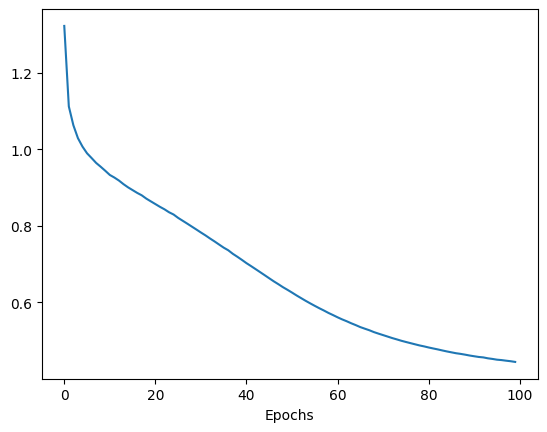

In [54]:
plt.plot(model_history.history["loss"], label="Training Loss")
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

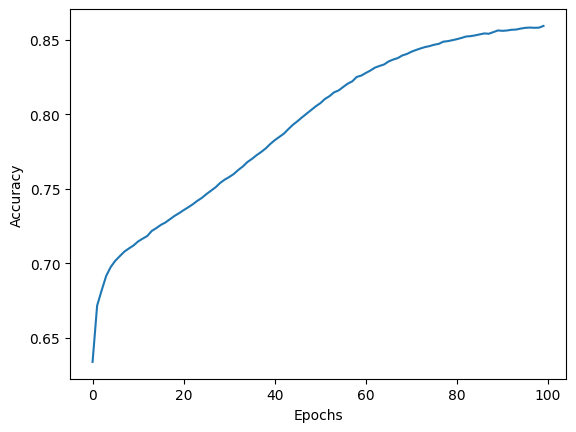

In [55]:
plt.plot(model_history.history["accuracy"], label="Training accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

In [56]:
text = "मान्दछन्"
text = list(text)
text

['म', 'ा', 'न', '्', 'द', 'छ', 'न', '्']

In [57]:
text_sequence = tokenizer.texts_to_sequences([text])
text_sequence

[[25, 5, 15, 8, 41, 57, 15, 8]]

In [58]:
padded_sequences = pad_sequences(text_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding="pre")
padded_sequences

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25,  5, 15,  8,
        41, 57, 15,  8]])

In [59]:
start_token = word_index["<"]
end_token = word_index[">"]

In [60]:
decoder_input_sequence = np.zeros((1, MAX_SEQUENCE_LENGTH))
decoder_input_sequence.shape

(1, 20)

In [61]:
decoder_input_sequence[0, 0] = start_token
decoder_input_sequence # just the start token

array([[3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [62]:
transliterated_text = []
for i in range(MAX_SEQUENCE_LENGTH - 1):
    predicted_sequence_logits = model.predict([padded_sequences, decoder_input_sequence])
    predicted_label = np.argmax(predicted_sequence_logits[0, i, :])
    
    if predicted_label == end_token:
        break
    transliterated_text.append(index_word[predicted_label])
        
    decoder_input_sequence[0, i + 1] = predicted_label

"".join(transliterated_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'pradhanbhantrisangk'

In [63]:
def transliterate_text_from_devanagari_to_roman(text, model):
    text = list(text)
    text_sequence = tokenizer.texts_to_sequences([text])
    padded_sequences = pad_sequences(text_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding="pre")
    
    start_token = word_index["<"]
    end_token = word_index[">"]
    
    decoder_input_sequence = np.zeros((1, MAX_SEQUENCE_LENGTH))
    decoder_input_sequence[0, 0] = start_token
    
    transliterated_text = []
    for i in range(MAX_SEQUENCE_LENGTH - 1):
        predicted_sequence_logits = model.predict([padded_sequences, decoder_input_sequence])
        predicted_label = np.argmax(predicted_sequence_logits[0, i, :])

        if predicted_label == end_token:
            break
        transliterated_text.append(index_word[predicted_label])

        decoder_input_sequence[0, i + 1] = predicted_label

    return "".join(transliterated_text)

In [64]:
transliterate_text_from_devanagari_to_roman("न्", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


'pradhanbhantrisangk'